In [14]:
# # !pip install scikit-optimize
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir='/content/drive/MyDrive/ucd/'
base_dir='../../../folders/'

In [15]:
import pandas as pd
import numpy as np
import pickle
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
np.int = np.int_
import warnings
warnings.filterwarnings("ignore")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [16]:
data_base=[f'ucddb{i:003d}' for i in range(2, 29)]
data_base.remove('ucddb004')
data_base.remove('ucddb016')
print(data_base)

['ucddb002', 'ucddb003', 'ucddb005', 'ucddb006', 'ucddb007', 'ucddb008', 'ucddb009', 'ucddb010', 'ucddb011', 'ucddb012', 'ucddb013', 'ucddb014', 'ucddb015', 'ucddb017', 'ucddb018', 'ucddb019', 'ucddb020', 'ucddb021', 'ucddb022', 'ucddb023', 'ucddb024', 'ucddb025', 'ucddb026', 'ucddb027', 'ucddb028']


In [17]:
# df = pd.DataFrame()
# for file in data_base:
#     i=pd.read_csv(base_dir+f'feature/{file}_win.csv')
#     df = pd.concat([df, i], ignore_index=True)
# df.dropna(how='all', axis=1,inplace=True)
# df.to_csv(base_dir+f'all/all_win.csv', index=False)

In [18]:
data_set = pd.read_csv(base_dir+f'all/all_win.csv')
data_set = data_set.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
data_set

,HRV_MeanNN_x,HRV_SDNN_x,HRV_RMSSD_x,HRV_SDSD_x,HRV_CVNN_x,HRV_CVSD_x,HRV_MedianNN_x,HRV_MadNN_x,HRV_MCVNN_x,HRV_IQRNN_x,...,peak_to_peak_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y,impulse_factor_y,margin_factor_y,rms_y,anns
0,941.406250,13.877191,10.461470,10.590011,0.014741,0.011113,937.50000,11.582812,0.012355,23.437500,...,3.426618,0.499383,3.728094,-0.717594,0.220546,6.861699,1.513324,2.803092,2.316825,0
1,932.963710,19.740977,10.578175,10.598053,0.021159,0.011338,937.50000,11.582812,0.012355,15.625000,...,3.426618,0.510929,3.205934,-0.847646,0.219974,6.706639,1.475284,2.785778,2.378262,0
2,784.417230,84.031488,92.695165,94.005934,0.107126,0.118171,773.43750,57.914062,0.074879,93.750000,...,3.426618,0.512045,3.090319,-1.034765,0.213657,6.692021,1.429797,2.764269,2.453831,0
3,915.826613,27.783640,20.768127,21.063296,0.030337,0.022677,914.06250,23.165625,0.025344,27.343750,...,3.409035,0.460080,3.062617,-0.937992,0.185486,7.409661,1.374385,2.723429,2.526806,0
4,851.562500,115.654429,69.943265,71.024059,0.135814,0.082135,878.90625,98.453906,0.112019,146.484375,...,3.409035,0.469791,4.127472,-1.289496,0.184498,7.256494,1.338809,2.705254,2.589996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,42.248541,22.410536,22.369303,0.052560,0.027880,808.59375,28.957031,0.035812,33.203125,...,0.238339,0.114037,-1.477381,0.240137,0.037104,2.090020,0.077549,0.180015,3.074504,0
20400,740.985577,57.787447,17.377094,17.605423,0.077987,0.023451,734.37500,69.496875,0.094634,85.937500,...,0.238339,0.114434,-1.474395,0.259257,0.037259,2.082769,0.077601,0.180046,3.072412,0
20401,805.555556,13.043136,11.587810,11.754803,0.016191,0.014385,804.68750,11.582812,0.014394,15.625000,...,0.236386,0.113433,-1.441417,0.320433,0.036976,2.083932,0.077055,0.178622,3.068847,0
20402,808.159722,16.004808,10.889563,11.048543,0.019804,0.013475,812.50000,23.165625,0.028512,23.437500,...,0.236386,0.112289,-1.428370,0.317029,0.036602,2.105157,0.077054,0.178621,3.068897,2


In [19]:
# Assuming your target variable is named 'target'
x = data_set.drop('anns', axis=1)  # Features
y = data_set['anns']  # Target variable

# Create the estimator (in this case, LogisticRegression)
estimator = RandomForestClassifier(verbose=3)

# Create the RFE object
rfe = RFE(estimator, n_features_to_select=30, step=3, verbose=10)

# Fit the RFE object to the data
rfe.fit(x, y)

# Get the column names of the selected features
selected_features = x.columns[rfe.support_]

# Create a new DataFrame with the selected features
x = data_set[selected_features]

Fitting estimator with 187 features.
Fitting estimator with 184 features.
Fitting estimator with 181 features.
Fitting estimator with 178 features.
Fitting estimator with 175 features.
Fitting estimator with 172 features.
Fitting estimator with 169 features.
Fitting estimator with 166 features.
Fitting estimator with 163 features.
Fitting estimator with 160 features.
Fitting estimator with 157 features.
Fitting estimator with 154 features.
Fitting estimator with 151 features.
Fitting estimator with 148 features.
Fitting estimator with 145 features.
Fitting estimator with 142 features.
Fitting estimator with 139 features.
Fitting estimator with 136 features.
Fitting estimator with 133 features.
Fitting estimator with 130 features.
Fitting estimator with 127 features.
Fitting estimator with 124 features.
Fitting estimator with 121 features.
Fitting estimator with 118 features.
Fitting estimator with 115 features.
Fitting estimator with 112 features.
Fitting estimator with 109 features.
F

In [20]:
x

,HRV_MeanNN_x,HRV_Prc20NN_x,HRV_MeanNN_y,HRV_SDANN1_y,HRV_CVSD_y,HRV_MCVNN_y,HRV_pNN20_y,HRV_MinNN_y,HRV_MaxNN_y,HRV_CSI_y,...,mean_y,std_y,var_y,peak_to_peak_y,rmse_y,kurtosis_y,skewness_y,waveform_factor_y,peak_factor_y,rms_y
0,941.406250,929.6875,887.054896,55.045392,0.111944,0.062822,32.937685,304.6875,1656.2500,2.135823,...,2.264299,0.490537,0.240627,3.426618,0.499383,3.728094,-0.717594,0.220546,6.861699,2.316825
1,932.963710,929.6875,890.181903,34.516891,0.112334,0.062822,35.223881,304.6875,1656.2500,2.141173,...,2.322683,0.511149,0.261274,3.426618,0.510929,3.205934,-0.847646,0.219974,6.706639,2.378262
2,784.417230,750.0000,893.314933,59.306612,0.112102,0.062294,35.928144,304.6875,1656.2500,2.174932,...,2.396577,0.526978,0.277706,3.426618,0.512045,3.090319,-1.034765,0.213657,6.692021,2.453831
3,915.826613,898.4375,911.847370,38.943009,0.105690,0.049420,32.926829,304.6875,1656.2500,2.104974,...,2.480407,0.482002,0.232326,3.409035,0.460080,3.062617,-0.937992,0.185486,7.409661,2.526806
4,851.562500,789.0625,913.560780,54.877815,0.105679,0.036759,32.110092,304.6875,1656.2500,2.111037,...,2.546320,0.473641,0.224336,3.409035,0.469791,4.127472,-1.289496,0.184498,7.256494,2.589996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,803.819444,789.0625,793.849469,14.224312,0.020415,0.029071,12.466844,632.8125,882.8125,4.259738,...,3.073420,0.081616,0.006661,0.238339,0.114037,-1.477381,0.240137,0.037104,2.090020,3.074504
20400,740.985577,692.1875,794.921875,16.700587,0.019212,0.028788,12.500000,632.8125,882.8125,4.384533,...,3.071327,0.081651,0.006667,0.238339,0.114434,-1.474395,0.259257,0.037259,2.082769,3.072412
20401,805.555556,796.8750,800.289042,6.541426,0.018375,0.028788,10.723861,726.5625,882.8125,2.976027,...,3.067751,0.082016,0.006727,0.236386,0.113433,-1.441417,0.320433,0.036976,2.083932,3.068847
20402,808.159722,796.8750,793.662964,18.535262,0.018353,0.029071,10.344828,679.6875,882.8125,4.014655,...,3.067813,0.081559,0.006652,0.236386,0.112289,-1.428370,0.317029,0.036602,2.105157,3.068897


Class=0, n=4405 (21.589%)
Class=2, n=10347 (50.711%)
Class=3, n=2661 (13.042%)
Class=1, n=2991 (14.659%)


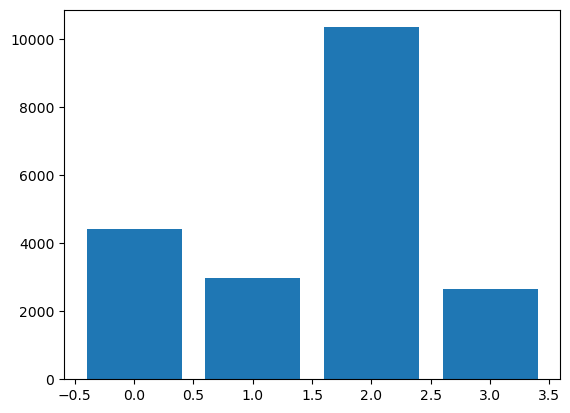

In [21]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,stratify=y,random_state=1)

In [23]:
del x
del y
del data_set

In [24]:
# model = GradientBoostingClassifier(verbose=3)
# model.fit(x_train, y_train)
# y_pred= model.predict(x_test)
# print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

In [25]:
m = GradientBoostingClassifier()
param_grid = {
    'learning_rate':[0.2,0.7],
    'max_depth': [9,12,15],
    'n_estimators': [80,100]

}
clf= BayesSearchCV(m, param_grid,n_iter=20,cv=5,verbose=3,n_jobs=-1,refit=True,scoring='f1_macro')
clf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END learning_rate=0.36857013577098185, max_depth=15, n_estimators=98;, score=0.885 total time= 2.8min
[CV 1/5] END learning_rate=0.36857013577098185, max_depth=15, n_estimators=98;, score=0.875 total time= 2.9min
[CV 5/5] END learning_rate=0.36857013577098185, max_depth=15, n_estimators=98;, score=0.891 total time= 2.9min
[CV 4/5] END learning_rate=0.36857013577098185, max_depth=15, n_estimators=98;, score=0.875 total time= 3.0min
[CV 2/5] END learning_rate=0.36857013577098185, max_depth=15, n_estimators=98;, score=0.872 total time= 3.0min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END learning_rate=0.32250851296776045, max_depth=12, n_estimators=95;, score=0.874 total time= 3.2min
[CV 5/5] END learning_rate=0.32250851296776045, max_depth=12, n_estimators=95;, score=0.893 total time= 3.2min
[CV 1/5] END learning_rate=0.32250851296776045, max_depth=12, n_estimators=95;, score=0.873 total time= 3

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
              n_jobs=-1, scoring='f1_macro',
              search_spaces={'learning_rate': [0.2, 0.7],
                             'max_depth': [9, 12, 15],
                             'n_estimators': [80, 100]},
              verbose=3)

In [26]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.4503352938457638, max_depth=12)


In [27]:
y_pred= clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['WAKE','REM','LIGHT','DEEP']))

              precision    recall  f1-score   support

        WAKE       0.89      0.76      0.82       881
         REM       0.95      0.92      0.94       598
       LIGHT       0.87      0.95      0.91      2070
        DEEP       0.95      0.86      0.90       532

    accuracy                           0.89      4081
   macro avg       0.91      0.87      0.89      4081
weighted avg       0.89      0.89      0.89      4081



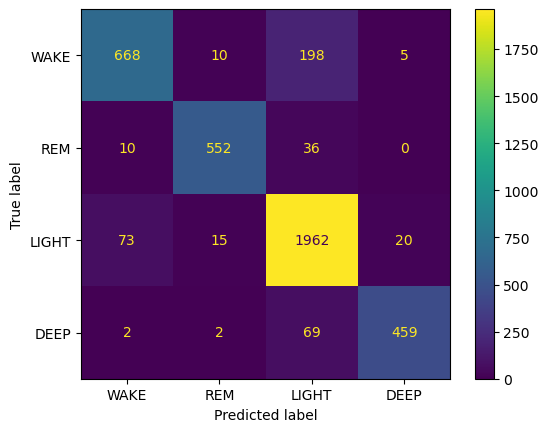

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['WAKE','REM','LIGHT','DEEP'])
disp.plot()
plt.show()